In [2]:
from scipy.optimize import fsolve

def f(x):
    x1 = x[0]
    x2 = x[1]
    return [2*x1 - x2**2 - 1, x1**2 - x2 - 2]

res = fsolve(f, [2, 3])
print(res)

[ 1.91963957  1.68501606]


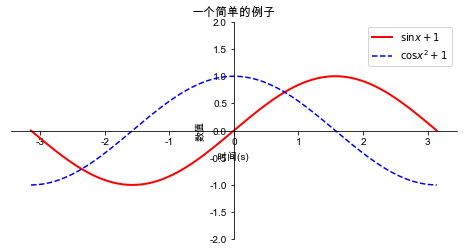

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# 变量关系方程
x = np.linspace(-np.pi, np.pi, 256,endpoint=True)
y = np.sin(x)
z = np.cos(x)

# 初始化
plt.figure(figsize = (8, 4)) 
# 设置中文字体
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False
# y轴范围设置
plt.ylim(-2, 2)
# 线条属性设置
plt.plot(x, y, label = '$\sin x+1$', color = 'red', linewidth = 2)
plt.plot(x, z, 'b--', label = '$\cos x^2+1$')
# X轴 Y轴 标题设置
plt.xlabel('时间(s) ')
plt.ylabel('数值')
plt.title('一个简单的例子')

ax = plt.gca()
ax.spines['right'].set_color("none")
ax.spines['top'].set_color("none")
ax.spines['left'].set_position(("data",0))
ax.spines['bottom'].set_position(("data",0))
# 绘图
plt.legend()
plt.show()


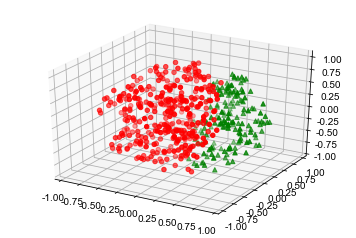

In [34]:
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d import Axes3D

np.random.seed(42)

# 采样个数500
n_samples = 500
dim = 3

# 先生成一组3维正态分布数据，数据方向完全随机
samples = np.random.multivariate_normal(
    np.zeros(dim),
    np.eye(dim),
    n_samples
)

# 通过把每个样本到原点距离和均匀分布吻合得到球体内均匀分布的样本
for i in range(samples.shape[0]):
    r = np.power(np.random.random(), 1.0/3.0)
    samples[i] *= r / np.linalg.norm(samples[i])

upper_samples = []
lower_samples = []

for x, y, z in samples:
    # 3x+2y-z=1作为判别平面
    if z > 3*x + 2*y - 1:
        upper_samples.append((x, y, z))
    else:
        lower_samples.append((x, y, z))

fig = plt.figure('3D scatter plot')
ax = fig.add_subplot(111, projection='3d')

uppers = np.array(upper_samples)
lowers = np.array(lower_samples)

# 用不同颜色不同形状的图标表示平面上下的样本
# 判别平面上半部分为红色圆点，下半部分为绿色三角
ax.scatter(uppers[:, 0], uppers[:, 1], uppers[:, 2], c='r', marker='o')
ax.scatter(lowers[:, 0], lowers[:, 1], lowers[:, 2], c='g', marker='^')

plt.show()

In [41]:
import pandas as pd 
s = pd.Series([1,2,3], index=['a', 'b', 'c'])
d = pd.DataFrame([[1,2,3], [4,5,6]], columns=['a', 'b', 'c'])
d2 = pd.DataFrame(s)
d.head()
d.describe()

,a,b,c
count,2.00000,2.00000,2.00000
mean,2.50000,3.50000,4.50000
std,2.12132,2.12132,2.12132
min,1.00000,2.00000,3.00000
25%,1.75000,2.75000,3.75000
50%,2.50000,3.50000,4.50000
75%,3.25000,4.25000,5.25000
max,4.00000,5.00000,6.00000


In [43]:
pd.read_excel('/Users/monstar/Desktop/test.xlsx')

,姓名,性别,年龄,班级,总成绩
0,张三,男,25,三班,498
1,李四,男,24,四班,568


In [54]:
from sklearn.linear_model import LinearRegression
from sklearn import datasets
from sklearn import svm

iris = datasets.load_iris()
clf = svm.LinearSVC()
clf.fit(iris.data, iris.target)
print(clf.predict([[5.0, 3.6, 1.3, 0.25]]))


[0]


In [55]:
from theano import function, config, shared, tensor
import numpy
import time

vlen = 10 * 30 * 768  # 10 x #cores x # threads per core
iters = 1000

rng = numpy.random.RandomState(22)
x = shared(numpy.asarray(rng.rand(vlen), config.floatX))
f = function([], tensor.exp(x))
print(f.maker.fgraph.toposort())
t0 = time.time()
for i in range(iters):
    r = f()
t1 = time.time()
print("Looping %d times took %f seconds" % (iters, t1 - t0))
print("Result is %s" % (r,))
if numpy.any([isinstance(x.op, tensor.Elemwise) and
              ('Gpu' not in type(x.op).__name__)
              for x in f.maker.fgraph.toposort()]):
    print('Used the cpu')
else:
    print('Used the gpu')

[Elemwise{exp,no_inplace}(<TensorType(float64, vector)>)]
Looping 1000 times took 1.970367 seconds
Result is [ 1.23178032  1.61879341  1.52278065 ...,  2.20771815  2.29967753
  1.62323285]
Used the cpu


In [18]:
import numpy as np
np.arange(12).reshape(2,2,3)

array([[[ 0,  1,  2],
        [ 3,  4,  5]],

       [[ 6,  7,  8],
        [ 9, 10, 11]]])